

---

What to find out from the Dataset:

# CO2 OF THE BIGGER COUNTRIES
*Make a graph of the CO2 emissions of the 5 biggest CO2 producers in the world (based on the latest measurement).*

The x-axis should be the years of 1990, 2005 and 2017. If newer datapoints are added in the future please include them as well. The y-axis should represent the fossil CO2 emissions in Mt CO2 for the given years.

# WORST AND BEST CHANGERS
Because of climate change it's important that we curb our carbon dioxide emissions. So some countries will have lowered their emissions while others may have increased their emissions. Some countries will have better results in doing this than others. If we calculate the relative change and sort by that change we'll get a list with countries that are changing for the better at one end and countries that are changing less well on the other end.

*Find the top three and bottom three countries with regards to lowering these emissions and plot their results.*



---



In [1]:
import pandas as pd
emissions = pd.read_csv('https://raw.githubusercontent.com/DASH-OF-GLITTER/WINC_Global_CO2_Emissions_Assignment/main/co2_emissions.csv')
emissions

,Country,1990,2005,2017,2021
0,World,22674.120,30049.810,37077.400,37857.58
1,World – International Aviation,258.941,422.777,543.381,NaN
2,World – International Shipping,371.804,572.169,677.248,NaN
3,Afghanistan,2.546,1.063,11.422,8.35
4,Albania,6.583,4.196,5.026,4.59
...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,321.41
208,Western Sahara,0.144,0.227,0.276,0.24
209,Yemen,6.887,21.768,12.503,12.05
210,Zambia,2.955,2.457,4.967,7.01


In [ ]:
#Remove rows that are not considered a country.
emissions = emissions.loc[3:]
emissions

,Country,1990,2005,2017,2021
3,Afghanistan,2.546,1.063,11.422,8.35
4,Albania,6.583,4.196,5.026,4.59
5,Algeria,65.677,98.197,159.929,173.00
6,Angola,5.851,15.975,30.876,24.45
7,Anguilla,0.006,0.014,0.028,0.03
...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,321.41
208,Western Sahara,0.144,0.227,0.276,0.24
209,Yemen,6.887,21.768,12.503,12.05
210,Zambia,2.955,2.457,4.967,7.01



---
# GRAPH 1: CO2 OF THE BIGGER COUNTRIES

Make a graph of the CO2 emissions of the 5 biggest CO2 producers in the world (based on the latest measurement).

In [ ]:
graph_1_top = emissions.loc[:,["Country", "1990", "2005", "2017", "2021"]] # Only selecting columns from Years: 90,05,17, 21.
graph_1_top = graph_1_top.drop([67]) # Remove row 67. EU is not a country.
graph_1_top = graph_1_top.sort_values(by='2021', ascending=False).head(5) # Sorting descending based on 2021 data.

graph_1_top = graph_1_top.sort_values(by='Country') #Sorting on Country to improve appearance on graph.
graph_1_top

,Country,1990,2005,2017,2021
42,China,2397.050,6263.06,10877.22,12466.32
93,India,605.968,1210.75,2454.77,2648.78
102,Japan,1149.400,1276.86,1320.78,1084.69
158,Russia,2378.920,1733.95,1764.87,1942.54
202,United States,5085.900,5971.57,5107.39,4752.08


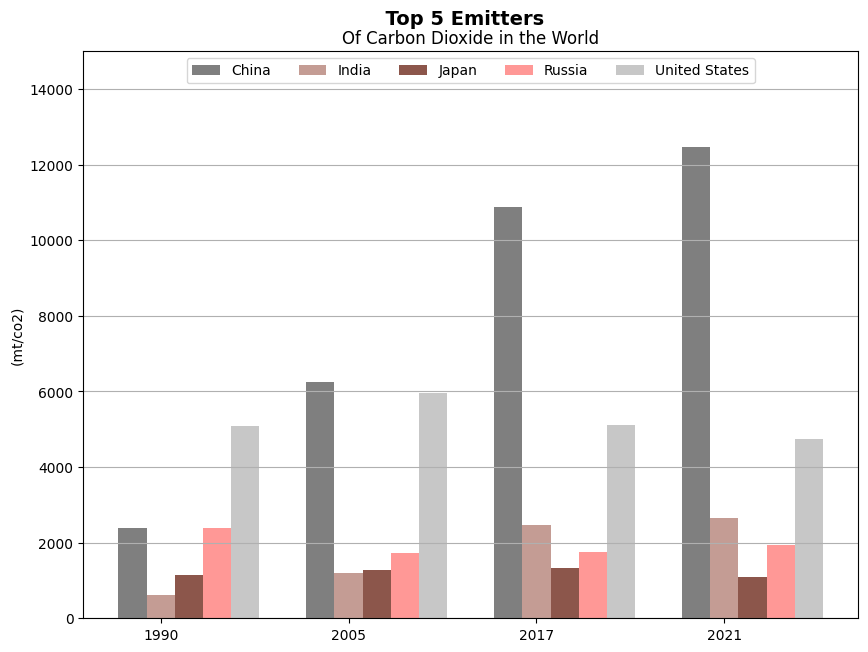

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Creating a variable to supply X Axis Labels.
years = graph_1_top.columns[1:]


x = np.arange(len(years))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(10, 7))

# These are the colors that will be used in the plot
ax.set_prop_cycle(color=['#7f7f7f', '#c49c94','#8c564b','#ff9896','#c7c7c7'])

# For loop to get plotpoints for each country
for column, row in graph_1_top.iterrows():
  country = (row['Country'])
  years = list(row[1:].keys())
  CO2 = list(row[1:].values)
  offset = width * multiplier
  rects = ax.bar(x + offset, CO2, width, label=country)

  multiplier += 1 # shift bar over 1 to the right to plot the next country.

ax.set_ylabel('(mt/co2)')

# The title is long. To improve appearance tile was sepearated in to two lines. With SupTitle and Title.
fig.suptitle('  Top 5 Emitters', fontsize=14, fontweight='bold')

fig.subplots_adjust(top=0.92) #Adjust Space between the Sup (top)Title and the Title below.

ax.set_title('Of Carbon Dioxide in the World')

ax.set_xticks(x + width, years)
ax.legend(loc='upper center', ncols=5)
ax.set_ylim(0, 15000)

plt.grid(axis='y')
plt.show()



---


# GRAPH 2: WORST AND BEST CHANGERS

Find the top three and bottom three countries with regards to lowering these emissions and plot their results.


---



In [ ]:
#Create new dataframe with only countries that emmit more then 5 Mt CO2 for 1990.
graph_2 = emissions.loc[:,["Country", "1990", "2005", "2017", "2021"]]
graph_2 = graph_2.loc[graph_2["1990"] >= 5]
graph_2

,Country,1990,2005,2017,2021
4,Albania,6.583,4.196,5.026,4.59
5,Algeria,65.677,98.197,159.929,173.00
6,Angola,5.851,15.975,30.876,24.45
9,Argentina,112.434,165.429,209.968,189.00
10,Armenia,20.699,4.542,4.832,6.77
...,...,...,...,...,...
204,Uzbekistan,123.106,116.386,95.350,125.65
206,Venezuela,109.268,152.464,145.877,104.67
207,Vietnam,20.182,99.231,218.729,321.41
209,Yemen,6.887,21.768,12.503,12.05


In [ ]:
#Limiting the float size to 3 decimal points.
pd.options.display.float_format = '{:.3f}'.format
#Creating new colums with percentage of change per year based on 1990.
graph_2['1990vs1990ch'] = graph_2.loc[:,'1990'] / graph_2.loc[:,'1990'] * 100
graph_2['2005vs1990ch'] = graph_2.loc[:,'2005'] / graph_2.loc[:,'1990'] * 100
graph_2['2017vs1990ch'] = graph_2.loc[:,'2017'] / graph_2.loc[:,'1990'] * 100
graph_2['2021vs1990ch'] = graph_2.loc[:,'2021'] / graph_2.loc[:,'1990'] * 100
graph_2 = graph_2.loc[:,["Country","1990vs1990ch", "2005vs1990ch", "2017vs1990ch", "2021vs1990ch"]] # Only selecting new columns from changed calculations
graph_2
graph_2_best = graph_2.sort_values(by='2021vs1990ch', ascending=True).head(3) # Creating dataframe Best changed based on 2021
graph_2_worst = graph_2.sort_values(by='2021vs1990ch', ascending=False).head(3) # Creating dataframe Worst changed based on 2021
graph_2_best.columns = ["Country", "1990", "2005", "2017", "2021"]# Renaming for better use in graph.
graph_2_best


,Country,1990,2005,2017,2021
199,Ukraine,100.000,45.253,26.267,23.679
128,Moldova,100.000,25.469,25.857,29.884
10,Armenia,100.000,21.943,23.344,32.707


In [ ]:
graph_2_worst.columns = ["Country", "1990", "2005", "2017", "2021"]# Renaming for better use in graph.
graph_2_worst

,Country,1990,2005,2017,2021
207,Vietnam,100.000,491.681,1083.783,1592.558
144,Oman,100.000,277.381,659.887,796.197
17,Bangladesh,100.000,280.026,609.648,770.623


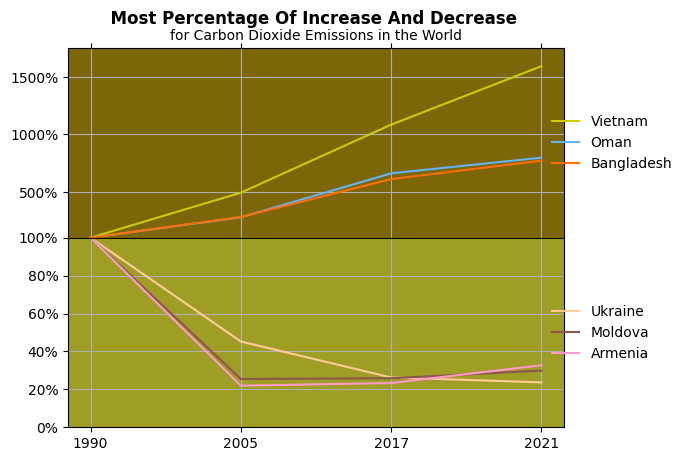

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

#Create one Fig with two ax's (the Worst Ax1 above)&(the Best Ax1 below). Sharing same X data.
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.00)  # adjust space between axes

# The title is long. To improve appearance tile was sepearated in to two lines. With SupTitle and Title.
fig.suptitle('  Most Percentage Of Increase And Decrease', fontsize=12, fontweight='bold')
fig.subplots_adjust(top=0.90)#Adjust Space between the Sup (top)Title and the Title below.
ax1.set_title('for Carbon Dioxide Emissions in the World', fontsize=10)
#add percentage symbol on Y data
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

years = graph_2_best.columns[1:]# Creating a variable to supply X Axis Labels.

ax1.set_prop_cycle(color=['#CCCC00','#64B5F6','#FF6F00'])#Costom Colors used for Worst data.
ax2.set_prop_cycle(color=['#FFCC99','#8c564b','#FF99CC'])#Costom Colors used for Best data.

ax1.set_facecolor('#7D6608')#Custom background color for Best data.
ax2.set_facecolor('#9E9D24')#Custom background color for Worst data.

ax1.tick_params(axis='both', which='major', labelsize=10)#Adjust size data Best on Y & X
ax2.tick_params(axis='both', which='major', labelsize=10)#Adjust size data Worst on Y & X

# For loops to get plotpoints for each country
for index, row in graph_2_worst.iterrows():
  ax1.plot(years, row[1:], label=row[0], lw=1.5)

for index, row in graph_2_best.iterrows():
  ax2.plot(years, row[1:], label=row[0], lw=1.5)

#Creating Legends for both that hover slightly over the result.
legend1 = ax1.legend(loc="center left", bbox_to_anchor=(0.95, 0.5))
legend2 = ax2.legend(loc="center left", bbox_to_anchor=(0.95, 0.5))

#Removing background and edge colors for both Legends.
legend1.legendPatch.set_facecolor('None')
legend1.legendPatch.set_edgecolor("None")

legend2.legendPatch.set_facecolor('None')
legend2.legendPatch.set_edgecolor("None")


# zoom-in / limit the view to different portions of the data
# To make the graph more interesting and readible. Due to Best & Worst extreme difference.
ax1.set_ylim(100, 1750)
ax2.set_ylim(0, 100)

# The spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(True)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Show grid for both for better readibility.
ax1.grid(True)
ax2.grid(True)

plt.show()